## **Final Project** ## 
**By - Deepti More 9003027** 

**Shireesha Thyaranahalli Narayana 8899911**

## **Proposal: Chest Cancer Detection using Deep Learning** ##

#### **Objective: The aim of this project is to develop a deep learning model, with specific focus on Convolutional Neural Networks. We plan to compare various CNN models in order to accurately classify chest CT-scan images into different types of lung cancer, including Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma, as well as normal cells.**


##### **Import Necessary Packages**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

## *About Dataset*

Description Data: To fit the model, the photos are in jpg or png format. Three kinds of chest cancer—adenocarcinoma, large cell carcinoma, and squamous cell carcinoma—as well as one folder containing normal cells are contained in the data. The main folder, called Data, is where all the step folders—test, train, and valid—are located.

- test is a set of tests.

- train as a symbol for a training set

- valid is a validation set representation.

- 70% of the training set

- 20% is the testing set.

- 10% is the validation set.

Adenocarcinoma
- Lung adenocarcinoma is the most prevalent type of lung cancer, accounting for around 40% of non-small cell lung cancer cases and 30% of all cases overall. Breast, prostate, and colorectal cancers are among the prevalent cancers that have adenocarcinomas.
- Lung adenocarcinomas are located in the outer lung region in the glands that aid in breathing and secrete mucus. Coughing, hoarseness, weakness, and weight loss are among the symptoms.

Large cell carcinoma
- Large-cell undifferentiated carcinoma: This type of lung cancer can develop anywhere in the lung and spreads swiftly. Typically, 10 to 15 percent of all instances of non-small cell lung cancer (NSCLC) are of this kind. Big-cell undifferentiated carcinoma has a propensity to proliferate swiftly.

Squamous cell carcinoma
- Squamous cell carcinoma: This kind of lung cancer is located in one of the main airway branches or centrally in the lung, where the bigger bronchi connect the trachea to the lung. About 30% of non-small cell lung cancers are squamous cell lung cancers, which are typically associated with smoking.

- And the standard CT-Scan pictures are in the final folder.

[Source](https://www.kaggle.com/code/yasserhessein/chest-cancer-classification-with-vvg-16)

### *Downloaded the dataset from* ➼ [Kaggle](https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images)

In [9]:
# File Directory for both the train and test
train_path = "D:/Conestoga/SEM 1/Foundation ML Frameworks/Project/archive/Data/train"
val_path = "D:/Conestoga/SEM 1/Foundation ML Frameworks/Project/archive/Data/valid"
test_path = "D:/Conestoga/SEM 1/Foundation ML Frameworks/Project/archive/Data/test"

## **Data Exploration and Visulization** ##

In [10]:
from pathlib import Path

def get_dataset_size(path):
    num_of_images = {}
    for folder in path.iterdir():
        num_of_images[folder.name] = len(list(folder.glob('*')))
    return num_of_images

# Define paths
train_path = Path("D:/Conestoga/SEM 1/Foundation ML Frameworks/Project/archive/Data/train")
val_path = Path("D:/Conestoga/SEM 1/Foundation ML Frameworks/Project/archive/Data/valid")
test_path = Path("D:/Conestoga/SEM 1/Foundation ML Frameworks/Project/archive/Data/test")

# Get the number of images per class in each set (train, validation and test)
train_set = get_dataset_size(train_path)
val_set = get_dataset_size(val_path)
test_set = get_dataset_size(test_path)

# Print results
print("Train set:")
for folder, count in train_set.items():
    print(f"{folder}: {count} images")
print("\nValidation set:")
for folder, count in val_set.items():
    print(f"{folder}: {count} images")
print("\nTest set:")
for folder, count in test_set.items():
    print(f"{folder}: {count} images")
# Labels for each classs
labels = ['Squamous.cell.carcinoma', 'Normal', 'Adenocarcinoma', 'Large.cell.carcinoma']


Train set:
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
normal: 148 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images

Validation set:
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 23 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 21 images
normal: 13 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 15 images

Test set:
adenocarcinoma: 120 images
large.cell.carcinoma: 51 images
normal: 54 images
squamous.cell.carcinoma: 90 images


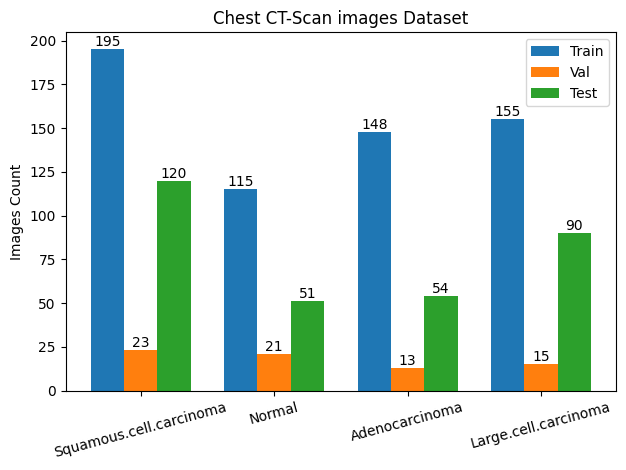

In [11]:
# Labels for each classs
labels = ['Squamous.cell.carcinoma', 'Normal', 'Adenocarcinoma', 'Large.cell.carcinoma']

# Create lists from previous dictionaries storing the count of images per category
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

# Labels location and bars widht 
x = np.arange(len(labels))  
width = 0.25  

# Create plot and 3 sets of bars (train, val, test)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add labels, title, legend, count values...
ax.set_ylabel('Images Count')
ax.set_title('Chest CT-Scan images Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()
ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

# Optimized layout and displaying plot
fig.tight_layout()
plt.show()

Data augmentation is performed to artificially increase the diversity of the training dataset by applying various transformations to the existing training samples. As a result, the model's generalization and robustness to different variations in the input data is improved.

In [12]:
# Image data generator with specified augmentation configurations (mostly geometric transformations)
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

# Using data generator to create augmented data from image files in train_path directory
train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

# Dictionary with class names to their respective indices in the generated data
train_data.class_indices

Found 613 images belonging to 4 classes.


{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [13]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')
val_data.class_indices

Found 72 images belonging to 4 classes.


{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [14]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')
test_data.class_indices

Found 315 images belonging to 4 classes.


{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [15]:
type(train_data) 

keras.preprocessing.image.DirectoryIterator

*train_data represents an iterator object that provides a convenient way to load and process image data from directories for training deep learning models using Keras.*

In [16]:
for data_batch, labels_batch in train_data:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (5, 350, 350, 3)
labels batch shape: (5, 4)


In [17]:
labels_batch

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

**Visulaization**

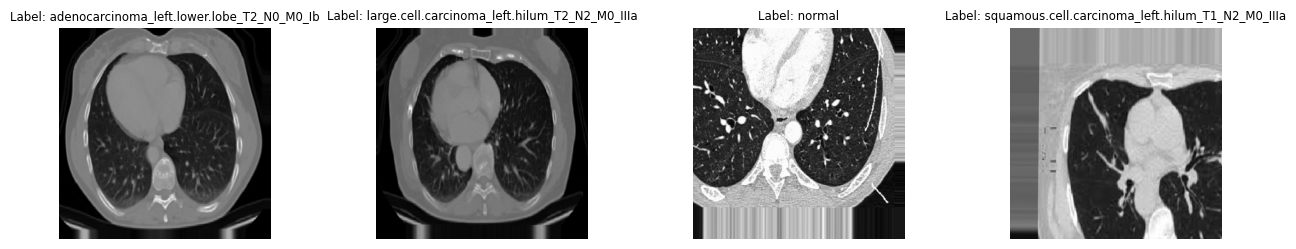

In [18]:
# Function to plot sample images with labels
def plot_sample_images(images, labels, class_indices):
    class_labels = list(class_indices.keys())
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))  
    fig.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots

    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title("Label: {}".format(class_labels[np.argmax(labels[i])]), fontsize=8.5)  # Adjust fontsize as needed
        axs[i].axis('off')

    plt.show()

# Sample and plotting of images with their respective labels from train_data
sample_images = []
sample_labels = []

# Ensure that at least one image from each class is included
for class_name in train_data.class_indices.keys():
    found = False
    for images, labels in train_data:
        for img, label in zip(images, labels):
            if np.argmax(label) == train_data.class_indices[class_name]:
                sample_images.append(img)
                sample_labels.append(label)
                found = True
                break
        if found:
            break

# Plot the sample images
plot_sample_images(sample_images, sample_labels, train_data.class_indices)


## *CNN Model*

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the input layer with the appropriate input shape for Chest CT scan images
inputs = keras.Input(shape=(350, 350, 3))

# Rescale the input pixel values to [0, 1]
x = layers.Rescaling(1./255)(inputs)

# Convolutional layers
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten layer to convert 2D feature maps into a 1D feature vector
x = layers.Flatten()(x)

# Output layer with sigmoid activation for binary classification
outputs = layers.Dense(1, activation="sigmoid")(x)

# Define the model
model = keras.Model(inputs=inputs, outputs=outputs)


In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 350, 350, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 174, 174, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                       

In [21]:
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=callbacks
)


Epoch 1/20
123/123 [==============================] - 44s 352ms/step - loss: 0.5687 - accuracy: 0.7492 - val_loss: 0.5638 - val_accuracy: 0.7500
Epoch 2/20
123/123 [==============================] - 44s 356ms/step - loss: 0.5636 - accuracy: 0.7500 - val_loss: 0.5634 - val_accuracy: 0.7500
Epoch 3/20
123/123 [==============================] - 45s 366ms/step - loss: 0.5633 - accuracy: 0.7500 - val_loss: 0.5633 - val_accuracy: 0.7500
Epoch 4/20
123/123 [==============================] - 51s 413ms/step - loss: 0.5632 - accuracy: 0.7500 - val_loss: 0.5631 - val_accuracy: 0.7500
Epoch 5/20
123/123 [==============================] - 47s 380ms/step - loss: 0.5631 - accuracy: 0.7500 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 6/20
123/123 [==============================] - 51s 415ms/step - loss: 0.5629 - accuracy: 0.7500 - val_loss: 0.5629 - val_accuracy: 0.7500
Epoch 7/20
123/123 [==============================] - 122s 998ms/step - loss: 0.5628 - accuracy: 0.7500 - val_loss: 0.5628 - val_a

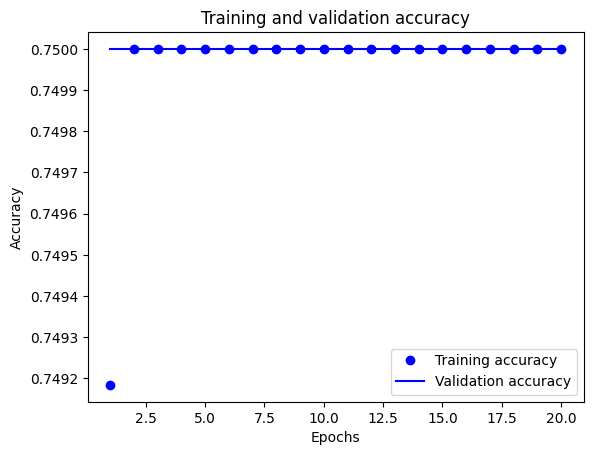

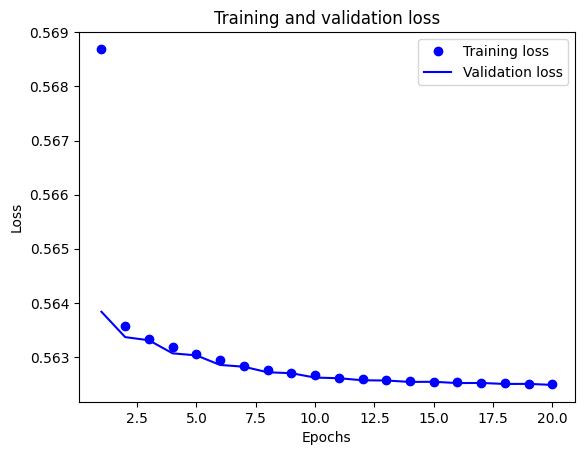

In [22]:
# Extracting training history
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting training and validation accuracy
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


63/63 [==============================] - 6s 99ms/step - loss: 0.5625 - accuracy: 0.7500
Test Loss: 0.5624844431877136
Test Accuracy: 0.75


63/63 [==============================] - 6s 95ms/step


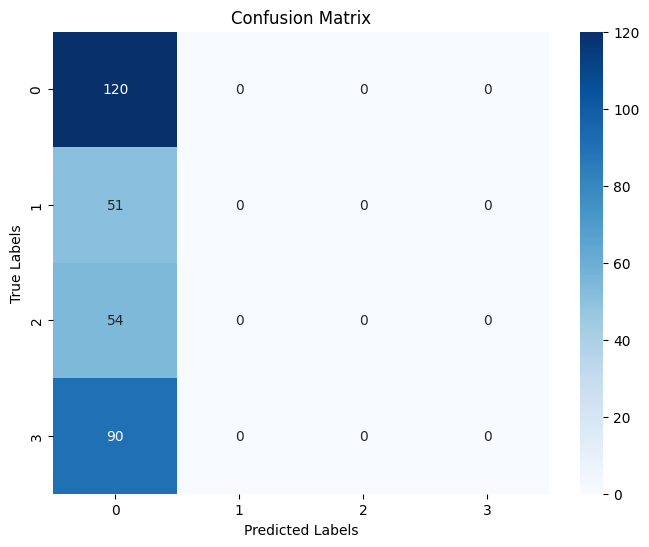

Classification Report:
               precision    recall  f1-score   support

           0       0.38      1.00      0.55       120
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        54
           3       0.00      0.00      0.00        90

    accuracy                           0.38       315
   macro avg       0.10      0.25      0.14       315
weighted avg       0.15      0.38      0.21       315



c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict probabilities for the test set
y_pred_probs = model.predict(test_data)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Get true labels
y_true = test_data.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


## *VGG16 Model*

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Load pre-trained VGG16 model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(350, 350, 3))

# Define your custom classification layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Freeze layers until the fourth from the last
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=callbacks
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
123/123 [==============================] - 146s 1s/step - loss: 0.6021 - accuracy: 0.7272 - val_loss: 0.5645 - val_accuracy: 0.7500
Epoch 2/20
123/123 [==============================] - 172s 1s/step - loss: 0.5689 - accuracy: 0.7500 - val_loss: 0.5654 - val_accuracy: 0.7500
Epoch 3/20
123/123 [==============================] - 173s 1s/step - loss: 0.5673 - accuracy: 0.7500 - val_loss: 0.5643 - val_accuracy: 0.7500
Epoch 4/20
123/123 [==============================] - 173s 1s/step - loss: 0.5665 - accuracy: 0.7500 - val_loss: 0.5664 - val_accuracy: 0.7500
Epoch 5/20
123/123 [==============================] - 172s 1s/step - loss: 0.5661 - accuracy: 0.7500 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 6/20
123/123 [==============================] - 172s 1s/step - loss: 0.5661 - accuracy: 0.7500 - val_loss: 0.5636 - val_accuracy: 0.7500
Epoch 7/20
123/123 [==============================] - 171s 1s/step - loss: 0.5659 - accuracy: 0.7500 - val_loss: 0.5626 - val_accuracy: 0.7500

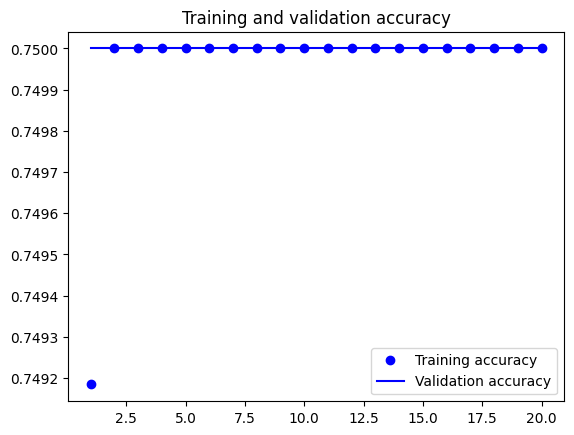

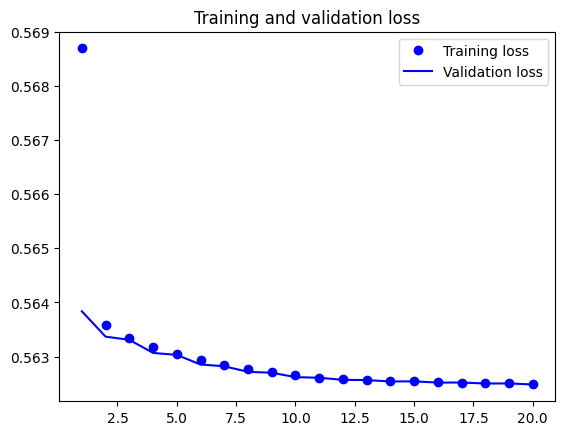

In [31]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Fine Tuning**

In [33]:
import matplotlib.pyplot as plt


# Fine-tuning the model
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/fine_tuned_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=callbacks
)

Epoch 1/20
123/123 [==============================] - 42s 340ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500
Epoch 2/20
123/123 [==============================] - 43s 350ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500
Epoch 3/20
123/123 [==============================] - 46s 375ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 4/20
123/123 [==============================] - 52s 425ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 5/20
123/123 [==============================] - 146s 1s/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 6/20
123/123 [==============================] - 42s 344ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 7/20
123/123 [==============================] - 107s 874ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_acc

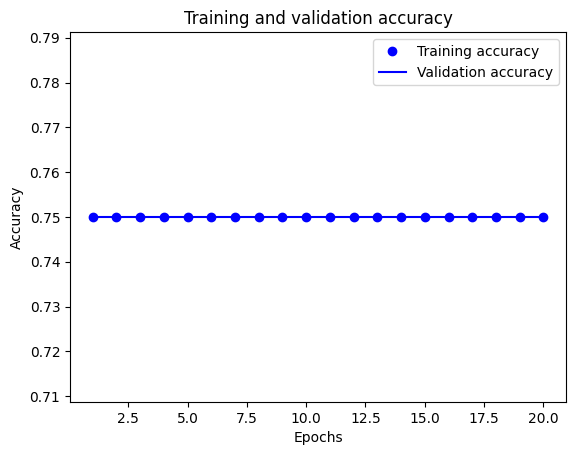

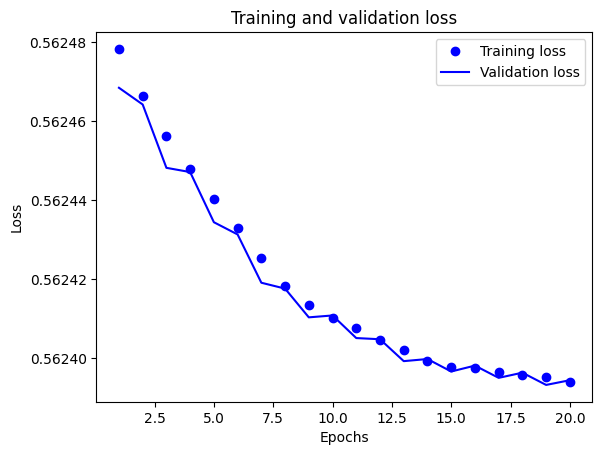

63/63 [==============================] - 5s 80ms/step - loss: 0.5624 - accuracy: 0.7500
Test Loss: 0.5623931884765625
Test Accuracy: 0.75


In [34]:

# Plot training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Load the best model
model = keras.models.load_model("./models/fine_tuned_model.keras")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


63/63 [==============================] - 6s 86ms/step


c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


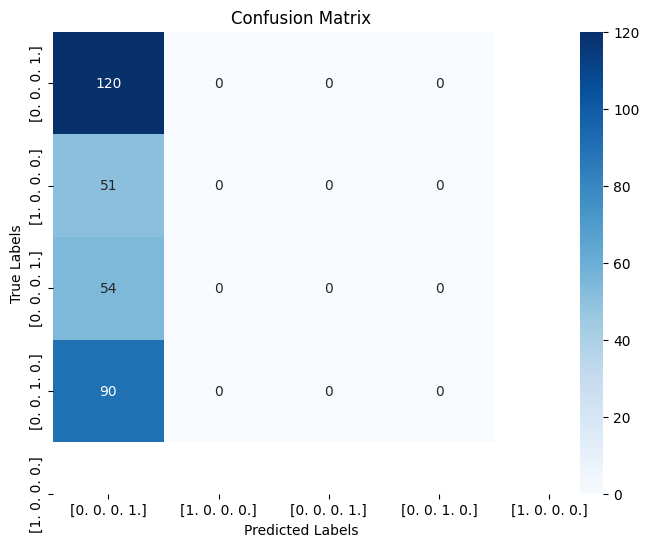

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities for the test set
y_pred_probs = model.predict(test_data)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = test_data.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [37]:
from sklearn.metrics import classification_report

# Specify the correct labels
labels = ['Squamous.cell.carcinoma', 'Normal', 'Adenocarcinoma', 'Large.cell.carcinoma']

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print("Classification Report:\n", class_report)



Classification Report:
                          precision    recall  f1-score   support

Squamous.cell.carcinoma       0.38      1.00      0.55       120
                 Normal       0.00      0.00      0.00        51
         Adenocarcinoma       0.00      0.00      0.00        54
   Large.cell.carcinoma       0.00      0.00      0.00        90

               accuracy                           0.38       315
              macro avg       0.10      0.25      0.14       315
           weighted avg       0.15      0.38      0.21       315



c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\deept\CSCN8010---Class-NoteBook\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## **Conclusion** ##

CNN Model Performance:

The CNN model achieves an overall accuracy of 75%, indicating poor performance in correctly classifying the images.
Looking at the precision, recall, and F1-score for each class, it's evident that the model performs poorly across all classes. It fails to effectively distinguish between the different types of cell carcinomas.
The confusion matrix shows that the model is often predicting the majority class for all samples, leading to high precision but low recall and F1-score for the minority classes.

Fine-Tuned VGG Model Performance:

The fine-tuned VGG model achieves the same overall accuracy of 75% as the original VGG model, indicating that fine-tuning did not significantly improve performance.
Similar to the CNN model, the precision, recall, and F1-score for each class are low, indicating poor performance in correctly classifying the images.
The confusion matrix also shows a similar pattern of misclassifications, with the majority class dominating the predictions.
Conclusion:

Both models are struggling to effectively learn the features necessary for distinguishing between different types of cell carcinomas.
Possible reasons for poor performance could include insufficient data, imbalanced class distribution, or suboptimal model architecture.